In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
# import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
data_dir = 'C:\dev\projects\image_classifier\data' # change the path according to your data path

train_dir = os.path.join(data_dir,'training')
validation_dir = os.path.join(data_dir,'test')

batch_size = 32
img_height = 180
img_width = 180

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=(img_height,img_width), batch_size=batch_size,
                   interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      fill_mode='nearest',samplewise_std_normalization=True,
      **datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9598 images belonging to 2 classes.
Found 38394 images belonging to 2 classes.
Found 47992 files belonging to 2 classes.
Using 38394 files for training.
Found 47992 files belonging to 2 classes.
Using 9598 files for validation.


In [6]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['Test', 'Training']


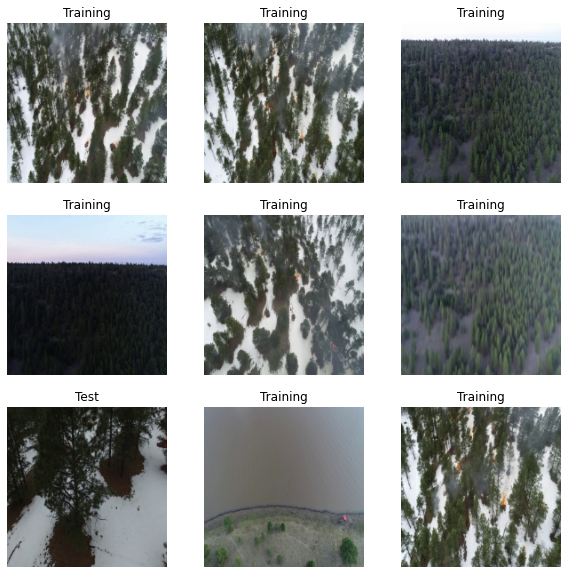

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 2

model = tf.keras.models.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [50]:
epochs=15
history = model.fit(
  train_generator,
  validation_data=train_generator,
    steps_per_epoch=100,
  epochs=epochs,
    validation_steps=50,
    verbose=1
)

Epoch 1/5
100/100 [==============================] - 116s 1s/step - loss: 1.3419 - accuracy: 0.7371 - val_loss: 0.1195 - val_accuracy: 0.9669
Epoch 2/5
100/100 [==============================] - 115s 1s/step - loss: 0.1329 - accuracy: 0.9542 - val_loss: 0.0449 - val_accuracy: 0.9869
Epoch 3/5
100/100 [==============================] - 122s 1s/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0259 - val_accuracy: 0.9937
Epoch 4/5
100/100 [==============================] - 117s 1s/step - loss: 0.0254 - accuracy: 0.9947 - val_loss: 0.0220 - val_accuracy: 0.9944
Epoch 5/5
100/100 [==============================] - 121s 1s/step - loss: 0.0240 - accuracy: 0.9932 - val_loss: 0.0094 - val_accuracy: 0.9981


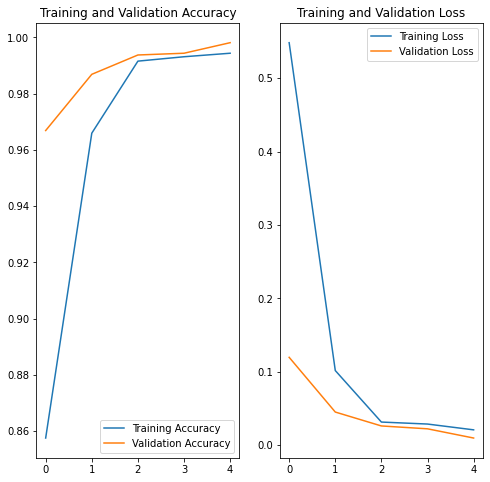

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [52]:
model.evaluate(valid_generator)
    

300/300 [==============================] - 71s 237ms/step - loss: 0.3852 - accuracy: 0.8853


[0.38518738746643066, 0.8852885961532593]

In [65]:
# STEP_SIZE_TEST=valid_generator.n //valid_generator.batch_size
# valid_generator.reset()
preds = model.predict(valid_generator,
verbose=1).ravel()

c:\users\vallabh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


300/300 [==============================] - 77s 256ms/step


In [ ]:
from sklearn import metrics
fpr, tpr,_ = metrics.roc_curve(valid_generator, preds[:])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()